In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import StratifiedKFold
import csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.tree import export_graphviz
import graphviz
import sys
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import time
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('ignore', category=PerformanceWarning)
import sys
sys.path.append("../tools/")
from func import lgb_train_actual_power, normalize

In [ ]:
i = 1
train = pd.read_csv('../dataset/prepared_dataset/train_{i}.csv'.format(i=i))
test = pd.read_csv('../dataset/prepared_dataset/test_{i}.csv'.format(i=i))
train_list = 'train_{i}.csv'.format(i=i)

In [3]:
more_train = pd.read_csv('../dataset/final_dataset/train_{i}.csv'.format(i=i))
more_test = pd.read_csv('../dataset/final_dataset/test_{i}.csv'.format(i=i))
train = pd.concat([train, more_train['pred_power_effi']], axis=1)
test = pd.concat([test, more_test['pred_power_effi']], axis=1)

In [4]:
train['pred_power_effi'] = normalize(train['pred_power_effi'])
test['pred_power_effi'] = normalize(test['pred_power_effi'])
train = train.fillna(0)
test = test.fillna(0)

In [5]:
train_labels = train['实际功率']
train_featrues = train.drop(['实际功率'], axis=1)
test_labels = test['实际功率']
test_features = test.drop(['实际功率'], axis=1)

In [6]:
lgb_params = {
        "objective": "regression",
        "metric": "mse",
        "num_leaves": 50,
        "min_child_samples": 100,
        "learning_rate": 0.02,
        "bagging_fraction": 0.7,
        "feature_fraction": 0.5,
        "bagging_frequency": 5,
        "bagging_seed": 666,
        "verbosity": -1
    }
experiment_time = '21'

begin train
[LightGBM] [Warning] Unknown parameter: bagging_frequency
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 10.0578
[200]	valid_0's l2: 4.55226
[300]	valid_0's l2: 3.85221
[400]	valid_0's l2: 3.62098
[500]	valid_0's l2: 3.48854
[600]	valid_0's l2: 3.40066
[700]	valid_0's l2: 3.34776
[800]	valid_0's l2: 3.30172
[900]	valid_0's l2: 3.26512
[1000]	valid_0's l2: 3.24116
[1100]	valid_0's l2: 3.21988
[1200]	valid_0's l2: 3.19872
[1300]	valid_0's l2: 3.17937
[1400]	valid_0's l2: 3.16195
[1500]	valid_0's l2: 3.14798
[1600]	valid_0's l2: 3.14042
[1700]	valid_0's l2: 3.13372
[1800]	valid_0's l2: 3.1253
[1900]	valid_0's l2: 3.11251
[2000]	valid_0's l2: 3.10075
[2100]	valid_0's l2: 3.09588
[2200]	valid_0's l2: 3.09204
[2300]	valid_0's l2: 3.08572
[2400]	valid_0's l2: 3.07967
[2500]	valid_0's l2: 3.07755
[2600]	valid_0's l2: 3.07448
[2700]	valid_0's l2: 3.06699
[2800]	valid_0's l2: 3.06234
[2900]	valid_0's l2: 3.0577
Early stopping, best iteration is:
[28

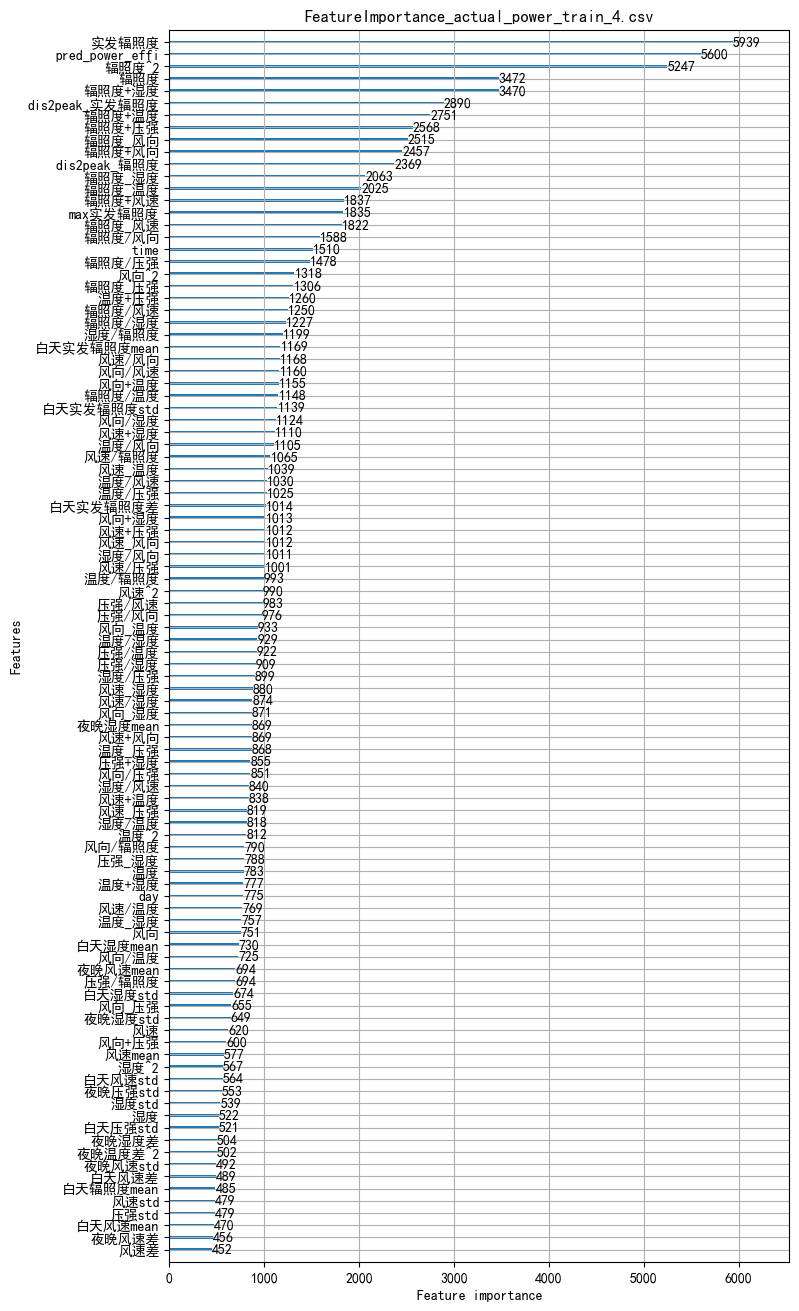

In [7]:
X_train_final, X_validation_final, y_train_final, y_validation_final = train_test_split(train_featrues, train_labels, test_size=0.1, random_state=678)
pred_label_final_lgb = lgb_train_actual_power(X_train_final, y_train_final, X_validation_final, y_validation_final, test_features, lgb_params, ['predicition'], experiment_time, train_list)

In [8]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred)) ** 2))

In [9]:
# mse
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test_labels, pred_label_final_lgb['predicition'])
mae = mean_absolute_error(test_labels, pred_label_final_lgb['predicition'])
rmse = rmse(test_labels, pred_label_final_lgb['predicition'])
print(f'MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}')

MSE: 34.7529, MAE: 3.9401, RMSE: 5.8952
